<a href="https://colab.research.google.com/github/KSaiBharadwaj/fraudanalytics/blob/main/DSO562HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

**Problem 1: Building kNN Model based on Class**

In [115]:
# importing the data and doing prilimnary analysis

disease = pd.read_csv("/content/sample_data/Numerical_ckd.csv")

# disease.info()

In [116]:
# disease.head()

In [117]:
# Segregating the dataset into training and testing

disease_x = disease.drop(columns=['Class'])
disease_y = disease.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(disease_x, disease_y,
                                                    test_size=0.33,
                                                    random_state=42)

def classifier(xtr, xte, ytr, yte, n):
  knnclf = neighbors.KNeighborsClassifier(n_neighbors=n)
  knnclf.fit(xtr, ytr)

  y_predict = knnclf.predict(xte)
  print("The Acurracy score is:",accuracy_score(y_pred=y_predict, y_true=yte),
        "for k:",n)
  print("The Confusion Matrix is:")
  print(confusion_matrix(y_pred=y_predict, y_true=yte))

classifier(X_train, X_test, y_train, y_test, 3)
classifier(X_train, X_test, y_train, y_test, 5)
classifier(X_train, X_test, y_train, y_test, 7)

The Acurracy score is: 0.8301886792452831 for k: 3
The Confusion Matrix is:
[[37  2]
 [ 7  7]]
The Acurracy score is: 0.8490566037735849 for k: 5
The Confusion Matrix is:
[[39  0]
 [ 8  6]]
The Acurracy score is: 0.8490566037735849 for k: 7
The Confusion Matrix is:
[[39  0]
 [ 8  6]]


**Problem 2: Plotting Accuracy with respect to k**

Text(0, 0.5, 'Accuracy')

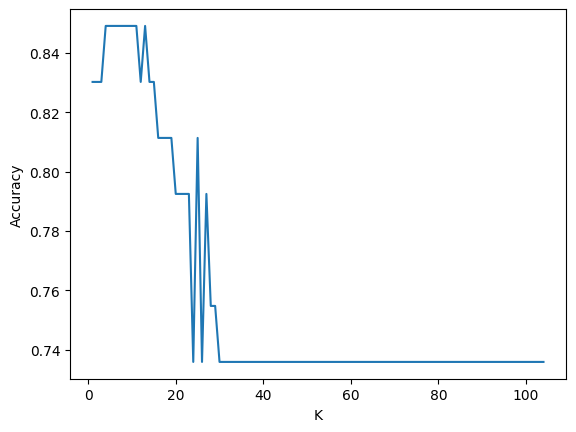

In [118]:
accuracy_val = []
k = []

for x in range(1, X_train.shape[0]):
  k.append(x)
  knnclf = neighbors.KNeighborsClassifier(n_neighbors=x)
  knnclf.fit(X_train, y_train)

  y_predict = knnclf.predict(X_test)
  accuracy_val.append(accuracy_score(y_pred=y_predict, y_true=y_test))

plt.plot(k, accuracy_val)
plt.xlabel("K")
plt.ylabel("Accuracy")

**Problem 3: Scaled Data kNN modelling**

In [119]:
columns_disease = disease.columns

scaled_disease_train_nd = preprocessing.minmax_scale(disease)
scaled_disease = pd.DataFrame(scaled_disease_train_nd, columns=columns_disease)

# Segregating the scaled data into x and y

scaled_disease_x = scaled_disease.drop(columns=['Class'])
scaled_disease_y = scaled_disease.iloc[:,-1]

scx_train, scx_test, scy_train, scy_test = train_test_split(scaled_disease_x,
                                                            scaled_disease_y,
                                                            train_size=0.33,
                                                            random_state=42)

classifier(scx_train, scx_test, scy_train, scy_test, 3)
classifier(scx_train, scx_test, scy_train, scy_test, 5)
classifier(scx_train, scx_test, scy_train, scy_test, 7)

The Acurracy score is: 0.9811320754716981 for k: 3
The Confusion Matrix is:
[[75  0]
 [ 2 29]]
The Acurracy score is: 0.9811320754716981 for k: 5
The Confusion Matrix is:
[[75  0]
 [ 2 29]]
The Acurracy score is: 0.9716981132075472 for k: 7
The Confusion Matrix is:
[[75  0]
 [ 3 28]]


**As Observed the Accuracy score is incresed to 98% for low values of k**

**Problem 4: Calculating 3 nearest neighbors for russia and calulating the russian CPI**

In [120]:
russia_train = pd.read_csv("/content/sample_data/P4_CorruptionData_Train.csv")
russia_test = pd.read_csv("/content/sample_data/P4_CorruptionData_Test.csv")

# Segregating the data into train and test data

russia_train_x = russia_train.drop(columns=['CPI', 'Country ID', 'Unnamed: 0'])
russia_train_y = russia_train.iloc[:,-1]

russia_test_x = russia_test.drop(columns=['CPI', 'Country ID', 'Unnamed: 0'])
distances = []

for x in range(0, russia_train_x.shape[0]):
  row1 = russia_train_x.iloc[x]
  row2 = russia_test_x

  # Extract data as NumPy arrays
  data1 = row1.to_numpy()
  data2 = row2.to_numpy()

  # Calculating the Euclidean distance
  distances.append(np.sqrt(np.sum((data1 - data2)**2)))

russia_train['Distances'] = pd.DataFrame(distances)

In [121]:
# Segregating the 3 nearest neighbors

filtered3_russia = russia_train.sort_values(by='Distances',
                                            ascending=True).iloc[0:3]
russia_cpi = filtered3_russia['CPI'].mean()
print("The CPI of Russia is",russia_cpi)

The CPI of Russia is 4.589133333333334


**Problem 4 part c**

In [122]:
# updated dataframes
a = russia_train.drop(columns='Country ID')
b = russia_test.drop(columns='Country ID')
ca = a.columns
cb = b.columns
scaled_russia_train_nd = preprocessing.minmax_scale(a)
scaled_russia_test_nd = preprocessing.minmax_scale(b)

# Converting scaled data into dataframes
scaled_russia_train = pd.DataFrame(scaled_russia_train_nd,
                                   columns=ca).drop(columns=['CPI',
                                                             'Distances',
                                                             'Unnamed: 0'])
scaled_russia_test = pd.DataFrame(scaled_russia_test_nd,
                                  columns=cb).drop(columns=['CPI',
                                                            'Unnamed: 0'])

scaled_distances = []
for x in range(0, scaled_russia_train.shape[0]):
  row1 = scaled_russia_train.iloc[x]
  row2 = scaled_russia_test

  # Extract data as NumPy arrays
  data1 = row1.to_numpy()
  data2 = row2.to_numpy()

  # Calculating the Euclidean distance
  scaled_distances.append(np.sqrt(np.sum((data1 - data2)**2)))

russia_train['Scaled Distances'] = pd.DataFrame(scaled_distances)

# Segregating the 3 nearest neighbors

filtered3_russia = russia_train.sort_values(by='Scaled Distances',
                                            ascending=True).iloc[0:3]
russia_cpi = filtered3_russia['CPI'].mean()
print("The CPI of Russia after Scaling is",russia_cpi)

The CPI of Russia after Scaling is 3.164633333333333


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


**Problem 4 part e: The Scaling reduced the CPI a bit but it didn't help. It may be because there might be additional parameters that haven't been taken into consideration.**